In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import zipfile

zip_path = '/content/drive/MyDrive/cricket-dataset.zip'  # your zip file path
extract_path = '/content/Cricket_Project'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [7]:
import os

extracted_folder = '/content/Cricket_Project'
files = os.listdir(extracted_folder)
print(files)

['odi_Fow_Card.csv', 'odi_Partnership_Card.csv', 'odi_Bowling_Card.csv', 'odi_Matches_Data.csv', 'players_info.csv', 'odi_Batting_Card.csv']


In [8]:
import pandas as pd

odi_matches = pd.read_csv('/content/Cricket_Project/odi_Matches_Data.csv')
odi_fow = pd.read_csv('/content/Cricket_Project/odi_Fow_Card.csv')
odi_partnership = pd.read_csv('/content/Cricket_Project/odi_Partnership_Card.csv')
players_info = pd.read_csv('/content/Cricket_Project/players_info.csv')
odi_batting = pd.read_csv('/content/Cricket_Project/odi_Batting_Card.csv')
odi_bowling = pd.read_csv('/content/Cricket_Project/odi_Bowling_Card.csv')

In [9]:
print(odi_matches.shape)
print(odi_matches.columns)
print(odi_matches.dtypes)

print(odi_fow.shape)
print(odi_partnership.shape)
print(players_info.shape)
print(odi_batting.shape)
print(odi_bowling.shape)

(4745, 33)
Index(['ODI Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name',
       'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain',
       'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec',
       'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored',
       'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)',
       'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2',
       'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner',
       'Match Result Text', 'MOM Player', 'Team1 Playing 11',
       'Team2 Playing 11', 'Debut Players'],
      dtype='object')
ODI Match No               int64
Match ID                   int64
Match Name                object
Series ID                float64
Series Name               object
Match Date                object
Match Format              object
Team1 ID                 float64
Team1 Name                object
Team1 Captain            float64
Tea

In [10]:
print(odi_matches.head())
print(players_info.head())

   ODI Match No  Match ID                           Match Name  Series ID  \
0           488     65425   Australia Vs New Zealand 4Th Match    60879.0   
1           492     65428   New Zealand Vs Sri Lanka 7Th Match    60879.0   
2           495     65431  Australia Vs New Zealand 10Th Match    60879.0   
3           496     65432    Australia Vs Sri Lanka 11Th Match    60879.0   
4           508     64326       New Zealand Vs England 3Rd Odi    60882.0   

                                         Series Name  Match Date Match Format  \
0  Benson & Hedges World Series Cup Australia, Ne...  1988-01-07          ODI   
1  Benson & Hedges World Series Cup Australia, Ne...  1988-01-12          ODI   
2  Benson & Hedges World Series Cup Australia, Ne...  1988-01-17          ODI   
3  Benson & Hedges World Series Cup Australia, Ne...  1988-01-19          ODI   
4      England tour of New Zealand  - 1988 (1987/88)  1988-03-16          ODI   

   Team1 ID   Team1 Name  Team1 Captain  ...      

In [14]:
print(odi_matches.isnull().sum())
print(odi_fow.isnull().sum())
print(odi_partnership.isnull().sum())
print(players_info.isnull().sum())
print(odi_batting.isnull().sum())
print(odi_bowling.isnull().sum())

ODI Match No             0
Match ID                 0
Match Name               0
Series ID                0
Series Name              0
Match Date               0
Match Format             0
Team1 ID                 0
Team1 Name               0
Team1 Captain            0
Team1 Runs Scored        0
Team1 Wickets Fell       0
Team1 Extras Rec         0
Team2 ID                 0
Team2 Name               0
Team2 Captain            0
Team2 Runs Scored        0
Team2 Wickets Fell       0
Team2 Extras Rec         0
Match Venue (Stadium)    0
Match Venue (City)       0
Match Venue (Country)    0
Umpire 1                 0
Umpire 2                 0
Match Referee            0
Toss Winner              0
Toss Winner Choice       0
Match Winner             0
Match Result Text        0
MOM Player               0
Team1 Playing 11         0
Team2 Playing 11         0
Debut Players            0
dtype: int64
Match ID        0
innings         0
team           30
player         30
wicket         30
over  

In [15]:
odi_matches['Team1 Name'] = odi_matches['Team1 Name'].fillna('Unknown')
odi_matches['Team2 Name'] = odi_matches['Team2 Name'].fillna('Unknown')

In [16]:
odi_matches = odi_matches.dropna()


In [17]:
odi_matches = odi_matches.drop_duplicates()
odi_fow = odi_fow.drop_duplicates()
odi_partnership = odi_partnership.drop_duplicates()
players_info = players_info.drop_duplicates()
odi_batting = odi_batting.drop_duplicates()
odi_bowling = odi_bowling.drop_duplicates()


**Top 10 Teams Played Most Matches**

In [18]:
teams = pd.concat([odi_matches['Team1 Name'], odi_matches['Team2 Name']])
top_teams = teams.value_counts().head(10)
print(top_teams)

India           805
Sri Lanka       734
Pakistan        717
Australia       698
South Africa    625
West Indies     595
New Zealand     593
England         561
Zimbabwe        510
Bangladesh      418
Name: count, dtype: int64


**Total Matches Per Year**

In [19]:
odi_matches['Match Date'] = pd.to_datetime(odi_matches['Match Date'])
odi_matches['Year'] = odi_matches['Match Date'].dt.year

matches_per_year = odi_matches['Year'].value_counts().sort_index()
print(matches_per_year)

Year
1991      6
1992     49
1993     52
1994     91
1995     59
1996    121
1997    105
1998    106
1999    145
2000    127
2001    120
2002    137
2003    141
2004    122
2005    100
2006    153
2007    165
2008    106
2009    130
2010    129
2011    132
2012     80
2013    111
2014    111
2015    141
2016     80
2017    115
2018    120
2019    136
2020     42
2021     64
2022    152
2023    210
2024     27
Name: count, dtype: int64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

**Line Graph - Matches Played Per Year**

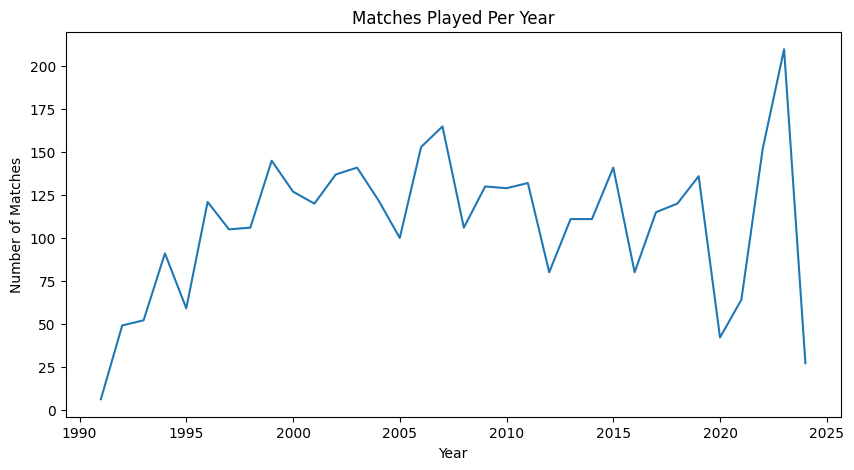

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values)
plt.title('Matches Played Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

**Bar Chart - Top Teams**

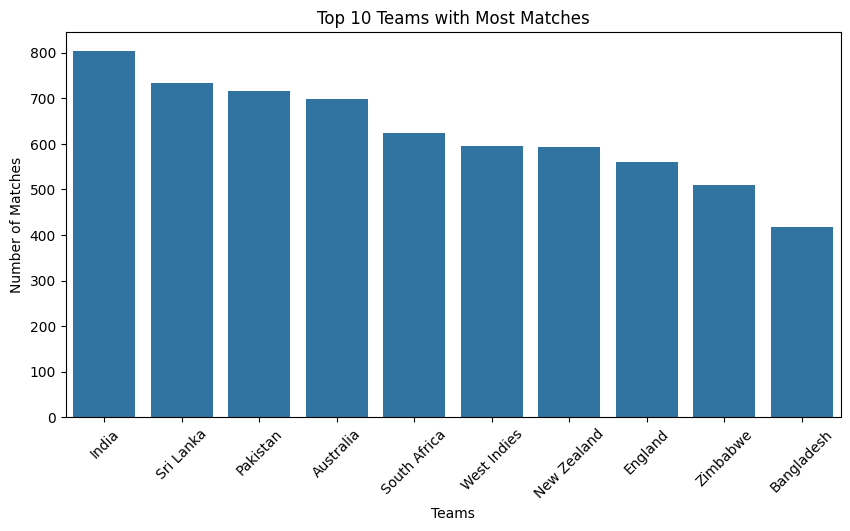

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title('Top 10 Teams with Most Matches')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

In [26]:
print("odi_matches:\n", odi_matches.dtypes)
print("odi_batting:\n", odi_batting.dtypes)
print("odi_bowling:\n", odi_bowling.dtypes)
print("odi_partnership:\n", odi_partnership.dtypes)
print("odi_fow:\n", odi_fow.dtypes)
print("players_info:\n", players_info.dtypes)


odi_matches:
 ODI Match No                      int64
Match ID                          int64
Match Name                       object
Series ID                       float64
Series Name                      object
Match Date               datetime64[ns]
Match Format                     object
Team1 ID                        float64
Team1 Name                       object
Team1 Captain                   float64
Team1 Runs Scored               float64
Team1 Wickets Fell              float64
Team1 Extras Rec                float64
Team2 ID                        float64
Team2 Name                       object
Team2 Captain                   float64
Team2 Runs Scored               float64
Team2 Wickets Fell              float64
Team2 Extras Rec                float64
Match Venue (Stadium)            object
Match Venue (City)               object
Match Venue (Country)            object
Umpire 1                         object
Umpire 2                         object
Match Referee             

In [27]:
# Convert dob to datetime
players_info['dob'] = pd.to_datetime(players_info['dob'], errors='coerce')

# Create dictionary for player ID to Name
player_dict = players_info.set_index('player_id')['player_name'].to_dict()

# Map to batting, bowling, partnership, fow datasets
odi_batting['Batsman Name'] = odi_batting['batsman'].map(player_dict)
odi_batting['Bowler Name'] = odi_batting['bowler'].map(player_dict)

odi_bowling['Bowler Name'] = odi_bowling['bowler id'].map(player_dict)

odi_partnership['Player 1'] = odi_partnership['player1'].map(player_dict)
odi_partnership['Player 2'] = odi_partnership['player2'].map(player_dict)

odi_fow['Player Name'] = odi_fow['player'].map(player_dict)


**Top 10 Run Scorers**

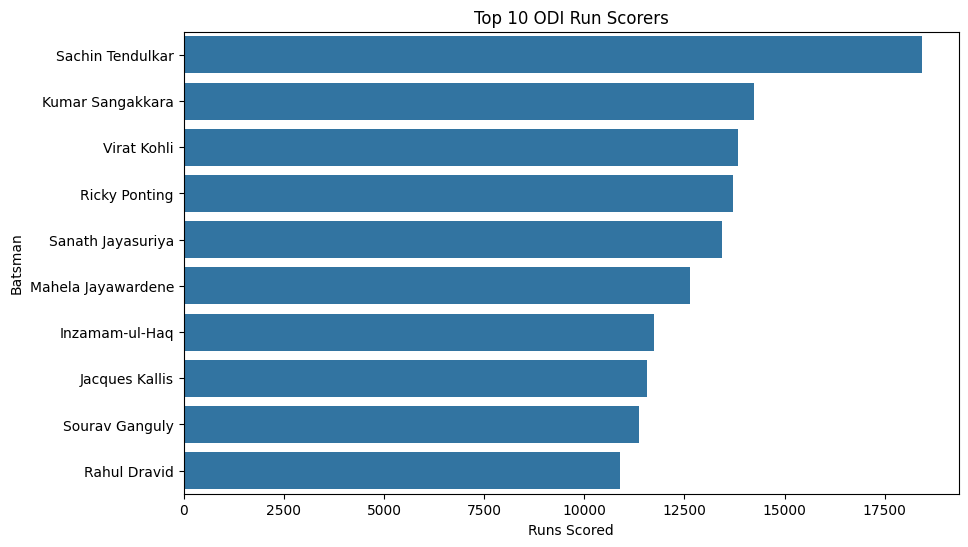

In [28]:
top_scorers = odi_batting.groupby('Batsman Name')['runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_scorers.values, y=top_scorers.index)
plt.title('Top 10 ODI Run Scorers')
plt.xlabel('Runs Scored')
plt.ylabel('Batsman')
plt.show()

**Top 10 Wicket Takers**

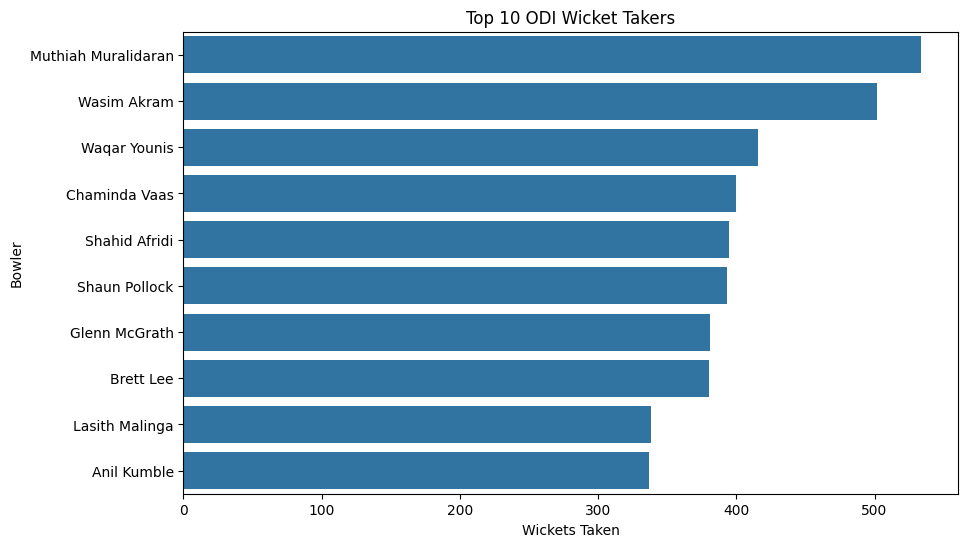

In [29]:
top_bowlers = odi_bowling.groupby('Bowler Name')['wickets'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index)
plt.title('Top 10 ODI Wicket Takers')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()

**Most Wins by Teams**

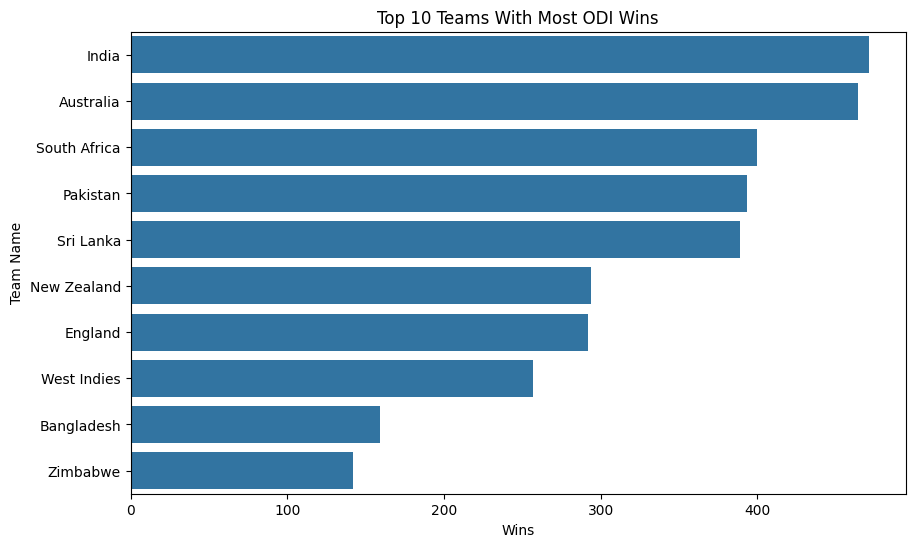

In [30]:
team_wins = odi_matches['Match Winner'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=team_wins.values, y=team_wins.index)
plt.title('Top 10 Teams With Most ODI Wins')
plt.xlabel('Wins')
plt.ylabel('Team Name')
plt.show()


**Top 5 Highest Partnerships**

In [31]:
top_partnerships = odi_partnership.sort_values(by='partnership runs', ascending=False).head(5)

print(top_partnerships[['Player 1', 'Player 2', 'partnership runs', 'Match ID']])

               Player 1        Player 2  partnership runs  Match ID
53599       Chris Gayle  Marlon Samuels             372.0    656427
64623     John Campbell       Shai Hope             365.0   1168508
15966  Sachin Tendulkar    Rahul Dravid             331.0     64631
22586    Sourav Ganguly    Rahul Dravid             318.0     65213
62527      Fakhar Zaman     Imam-ul-Haq             304.0   1142923


**Fall of Wickets Count (Top 10 Players)**

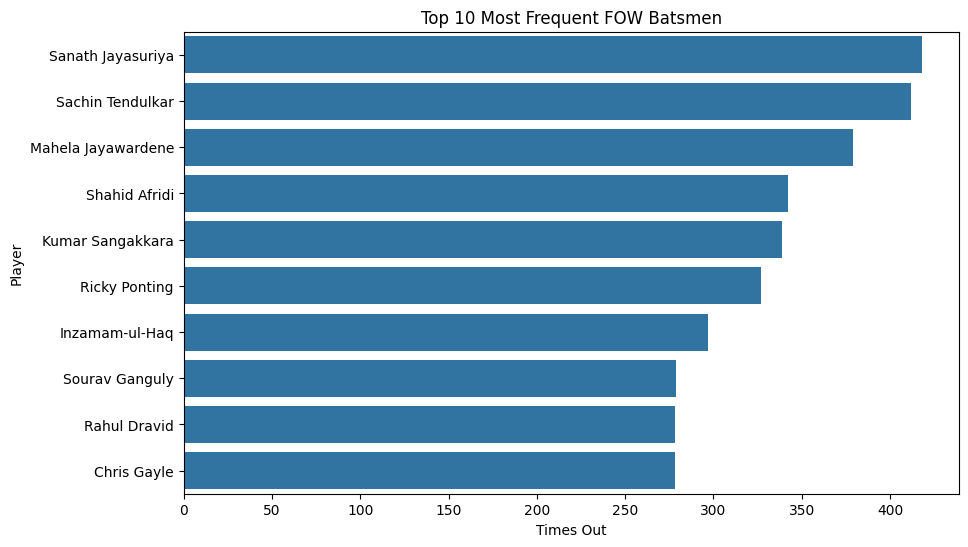

In [32]:
wicket_counts = odi_fow['Player Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=wicket_counts.values, y=wicket_counts.index)
plt.title('Top 10 Most Frequent FOW Batsmen')
plt.xlabel('Times Out')
plt.ylabel('Player')
plt.show()

**Extras Given by Team**

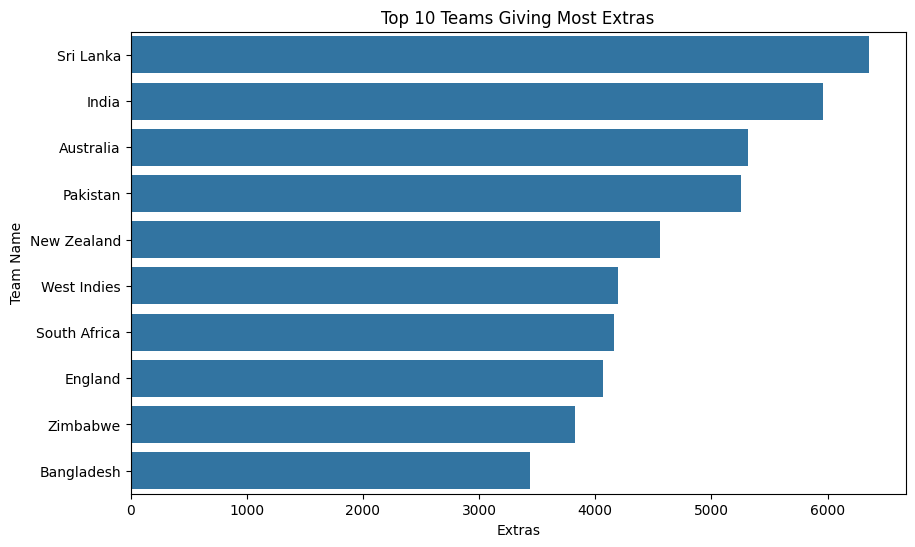

In [33]:
team_extras = odi_matches.groupby('Team1 Name')['Team1 Extras Rec'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=team_extras.values, y=team_extras.index)
plt.title('Top 10 Teams Giving Most Extras')
plt.xlabel('Extras')
plt.ylabel('Team Name')
plt.show()

**Toss Winner vs Match Winner**

In [34]:
same = odi_matches[odi_matches['Toss Winner'] == odi_matches['Match Winner']]
same_percent = (len(same) / len(odi_matches)) * 100
print(f"Toss winner also won the match in {same_percent:.2f}% of cases")

Toss winner also won the match in 50.26% of cases


**Country-wise Player Production**

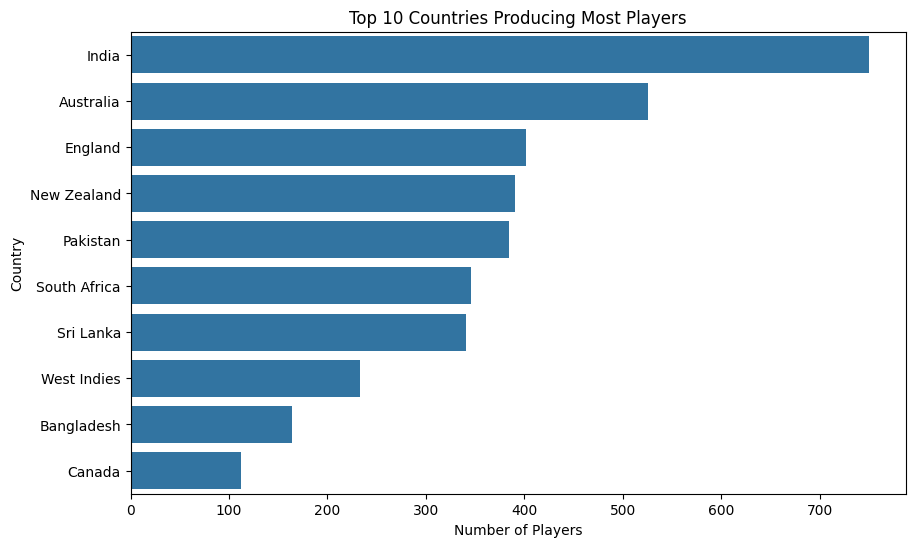

In [35]:
# First check unique country names
players_info['country_id'].unique()

# Map country IDs to names manually
country_mapping = {
    1.0: 'India',
    2.0: 'Australia',
    3.0: 'England',
    4.0: 'Pakistan',
    5.0: 'South Africa',
    6.0: 'New Zealand',
    7.0: 'Sri Lanka',
    8.0: 'West Indies',
    9.0: 'Bangladesh',
    10.0: 'Zimbabwe',
    11.0: 'Afghanistan',
    12.0: 'Ireland',
    13.0: 'Netherlands',
    14.0: 'Kenya',
    15.0: 'Scotland',
    16.0: 'UAE',
    17.0: 'Canada',
    18.0: 'USA'
}

# Map country_id to country names
players_info['country_name'] = players_info['country_id'].map(country_mapping)

# Count players from each country
country_players = players_info['country_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=country_players.values, y=country_players.index)
plt.title('Top 10 Countries Producing Most Players')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()

**Most Popular Stadiums for ODIs**

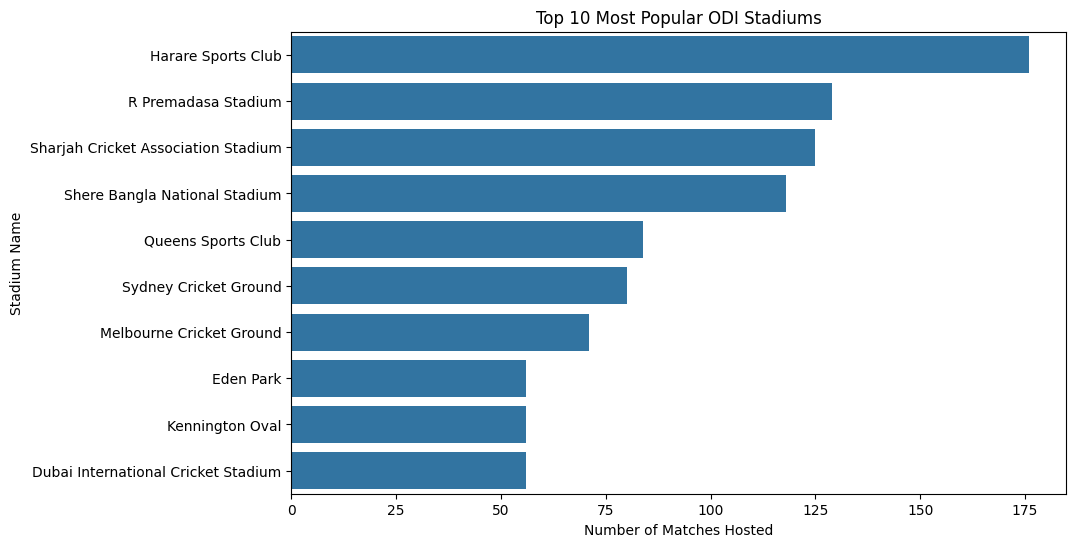

In [37]:
# Count matches at each stadium
stadium_count = odi_matches['Match Venue (Stadium)'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=stadium_count.values, y=stadium_count.index)
plt.title('Top 10 Most Popular ODI Stadiums')
plt.xlabel('Number of Matches Hosted')
plt.ylabel('Stadium Name')
plt.show()

**Tamim Iqbal Career Analysis**

In [38]:
# Select player name
selected_player = 'Tamim Iqbal'

# Find player ID
player_id = players_info[players_info['player_name'] == selected_player]['player_id'].values[0]

# If player ID is found
print(f"Player ID of {selected_player} is: {player_id}")

Player ID of Tamim Iqbal is: 48391


In [39]:
# Filter batting data for Tamim Iqbal
player_batting = odi_batting[odi_batting['batsman'] == player_id]

# Total runs
total_runs = player_batting['runs'].sum()

# Total balls faced
total_balls = player_batting['balls'].sum()

# Batting average = Total runs / (Total number of times out)
batting_average = total_runs / player_batting[player_batting['isOut'] == 'Yes'].shape[0]

# Total matches played (unique Match ID)
matches_played = player_batting['Match ID'].nunique()

# Display Batting Analysis
print(f"Batting Analysis for {selected_player}:")
print(f"Total Matches Played: {matches_played}")
print(f"Total Runs Scored: {total_runs}")
print(f"Total Balls Faced: {total_balls}")
print(f"Batting Average: {round(batting_average, 2)}")

Batting Analysis for Tamim Iqbal:
Total Matches Played: 240
Total Runs Scored: 8357.0
Total Balls Faced: 10642.0
Batting Average: inf


<ipython-input-39-344b35ab445b>:11: RuntimeWarning: divide by zero encountered in scalar divide
  batting_average = total_runs / player_batting[player_batting['isOut'] == 'Yes'].shape[0]


In [40]:
# Filter bowling data for Tamim Iqbal
player_bowling = odi_bowling[odi_bowling['bowler id'] == player_id]

# Total wickets
total_wickets = player_bowling['wickets'].sum()

# Total overs bowled
total_overs = player_bowling['overs'].sum()

# Display Bowling Analysis
print(f"\nBowling Analysis for {selected_player}:")
print(f"Total Wickets: {total_wickets}")
print(f"Total Overs Bowled: {total_overs}")


Bowling Analysis for Tamim Iqbal:
Total Wickets: 0.0
Total Overs Bowled: 0.6


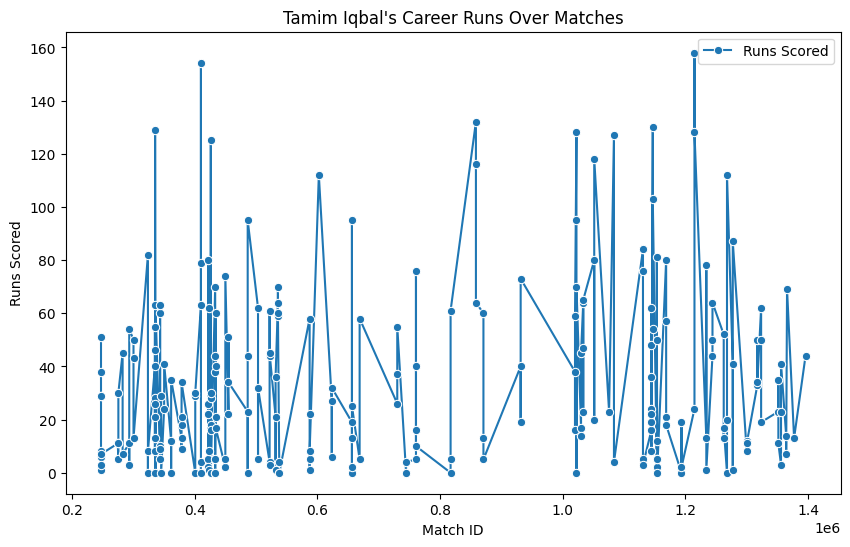

In [41]:
# Plot his runs in different matches
plt.figure(figsize=(10,6))
sns.lineplot(x='Match ID', y='runs', data=player_batting, marker='o', label='Runs Scored')
plt.title(f"Tamim Iqbal's Career Runs Over Matches")
plt.xlabel('Match ID')
plt.ylabel('Runs Scored')
plt.show()

In [42]:
# Find the best performance in a single match (highest runs scored)
best_match = player_batting.loc[player_batting['runs'].idxmax()]

print(f"\nBest Match Performance for {selected_player}:")
print(f"Match ID: {best_match['Match ID']}")
print(f"Runs Scored: {best_match['runs']}")


Best Match Performance for Tamim Iqbal:
Match ID: 1214668
Runs Scored: 158.0
